<a href="https://colab.research.google.com/github/CDAC-lab/isie2023/blob/main/tutorial-notebook-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exposing an AI based Question Answering Assistant on top of media content

# Overview

This notebook is designed to demonstrate an end-to-end pipeline leveraging the capabilities of OpenAI's Whisper, ChromaDB, and Langchain to enable intelligent querying of YouTube videos. We begin by taking a YouTube video URL, from which the audio is extracted and transcribed using Whisper, OpenAI's automatic speech recognition (ASR) system. This transcription is then vectorized using ChromaDB, a high-performance vector database, effectively transforming the unstructured text data into a structured, queryable form. Finally, Langchain is utilized to provide a natural language interface for querying the stored vector data, allowing users to extract meaningful information from the video content.

## Table of Contents

1. [Introduction and Setting Up](#section1)
    - Introduction to the Notebook
    - Installing Necessary Libraries
    - Importing Libraries and Dependencies
2. [Data Acquisition](#section2)
    - Getting Video Data from YouTube
    - Extracting Audio from YouTube Video
3. [Transcription using Whisper](#section3)
    - Introduction to Whisper
    - Transcribing Audio to Text
4. [Vectorization using ChromaDB](#section4)
    - Introduction to ChromaDB
    - Preprocessing Text for Vectorization
    - Vectorizing Text Data
5. [Querying with Langchain](#section5)
    - Introduction to Langchain
    - Setting Up Langchain for Querying
    - Formulating and Executing Queries
6. [Analysis and Visualization](#section6)
    - Analyzing Query Results
    - Visualizing Query Results
7. [Conclusion and Possible Extensions](#section7)
    - Summary of Achievements
    - Potential Future Work
8. [References and Additional Resources](#section8)




# Introduction and Setting Up

## Introduction to the Notebook
Welcome to our notebook! This project aims to create an end-to-end pipeline to extract, process, vectorize, and query the content of YouTube videos. By using state-of-the-art tools like Whisper, ChromaDB, and Langchain, we aim to transform unstructured video content into a structured and easily searchable form.

## Installing Necessary Libraries
In this section, we'll guide you through the installation process for all the necessary libraries that we'll use throughout this notebook. This includes OpenAI's Whisper for speech recognition, ChromaDB for vectorization, and Langchain for natural language querying.

## Importing Libraries and Dependencies
Here, we will import all the required Python libraries and dependencies that we'll be using in our notebook. This includes standard libraries for data handling and manipulation, as well as libraries specific to our pipeline such as the API wrappers for Whisper, ChromaDB, and Langchain.

## Install libraries

In [ ]:
!pip -qqq install git+https://github.com/openai/whisper.git
!pip -qqq install pytube
!pip install langchain
!pip install chromadb
!pip install openai

## Import libraries

In [3]:
#libraries for google drive authentication
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import whisper
import torch
import os
from pytube import YouTube
from langchain.text_splitter import CharacterTextSplitter
from langchain.document_loaders import DataFrameLoader
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQAWithSourcesChain
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.llms import OpenAI
import pandas as pd

In [4]:
# Import the libraries

# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the model
whisper_model = whisper.load_model("large", device=device)

100%|█████████████████████████████████████| 2.87G/2.87G [00:35<00:00, 85.9MiB/s]


# Data Acquisition

## Getting Video Data from YouTube
In this section, we'll discuss how to input a YouTube video URL and use it to extract the video data. This involves using a YouTube data extraction library to access and download the video.

## Extracting Audio from YouTube Video
After obtaining the video, the next step is to extract the audio which will be transcribed into text. We'll discuss the method used to perform this extraction and the format in which the audio data is saved.

# Transcription using Whisper

## Introduction to Whisper
Whisper is OpenAI's automatic speech recognition (ASR) system. In this section, we'll provide a brief introduction to Whisper and explain how it is used to transcribe the audio from our YouTube video.

## Transcribing Audio to Text
Here, we'll walk you through the process of transcribing the extracted audio into text using Whisper. This involves sending the audio data to the Whisper API and receiving a text transcript in return.

### Sample video from Youtube - Keynote Discussion: The Sustainable Development Goals (SDGs) –Today’s Implementation Challenges

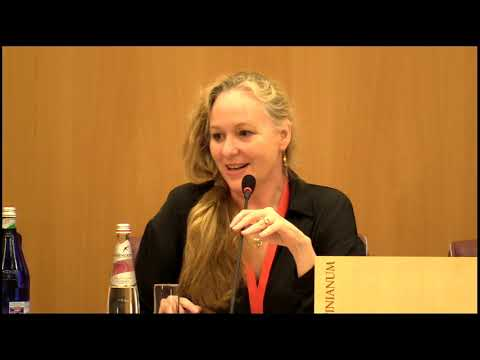

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('Z2sBVKP6XMM',width=800, height=600)

## Extract the audio from youtube video

In [6]:
def extract_and_save_audio(video_URL, destination, final_filename):
  video = YouTube(video_URL)#get video
  audio = video.streams.filter(only_audio=True).first()#seperate audio
  output = audio.download(output_path = destination)#download and save for transcription
  _, ext = os.path.splitext(output)
  new_file = final_filename + '.mp3'
  os.rename(output, new_file)

In [8]:
# Video to audio
video_URL = 'https://www.youtube.com/watch?v=EdlWxfDLhwQ'
destination = "."
final_filename = "The Sustainable Development Goals (SDGs)"
extract_and_save_audio(video_URL, destination, final_filename)

### Transcribe and storing in the drive

In [ ]:
# run the whisper model
audio_file = os.path.join(destination, "The Sustainable Development Goals (SDGs).mp3")
result = whisper_model.transcribe(audio_file)
transcription = pd.DataFrame(result['segments'])

#save in Google drive
transcription.to_csv(os.path.join(destination, final_filename+' transcription.csv'))

### Chunk Clips

In [ ]:
# transcription = pd.DataFrame(result['segments'])
transcription = pd.read_csv(r"The Sustainable Development Goals (SDGs) transcription.csv") #loading from the disk


def chunk_clips(transcription, clip_size):
  texts = []
  sources = []
  for i in range(0,len(transcription),clip_size):
    clip_df = transcription.iloc[i:i+clip_size,:]
    text = " ".join(clip_df['text'].to_list())
    source = str(round(clip_df.iloc[0]['start']/60,2))+ " - "+str(round(clip_df.iloc[-1]['end']/60,2)) + " min"
    print(text)
    print(source)
    texts.append(text)
    sources.append(source)

  return [texts,sources]



In [ ]:
chunks = chunk_clips(transcription, 50)
documents = chunks[0]
sources = chunks[1]

 ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  ♪♪  Thank you so much, Elizabeth.  I don't want to ever think that we don't have enough time for art.  If the challenge is to bring complexity to our perception,  there is no better way than to do that with art.  That's what experiencing art is,  is responding to complex relational processes,  exploring the boundaries of our perception,  making sense in new ways.  And it includes our intellect, our imagination, our memories.  It includes the body, it includes emotions.  These things are not separable, of course, of course.  And yet, in so much of our other discussion and analysis,  the first thing we do is separate them.  So we need the arts.  Thank you.  Thank you.  Thank you.  Thank you.  And especially for this upcoming session,  which is about the United Nations Sustainable Development Goals.  day, and we have quite a project in addressing this subject. Arguably the UN SDGs have off

# Vectorization using ChromaDB

## Introduction to ChromaDB
ChromaDB is a high-performance vector database used to transform our text data into a structured, queryable form. In this section, we'll explain what ChromaDB is and why it's useful in our pipeline.

## Preprocessing Text for Vectorization
Before we can vectorize our text data, it may need to be preprocessed. This section discusses any necessary preprocessing steps such as tokenization or normalization.

## Vectorizing Text Data
Once our text data is preprocessed, it's time to vectorize it using ChromaDB. We'll explain how to send our text data to ChromaDB, receive vectorized data in return, and store this data for future use.

## Process text and store in VectorDB

In [ ]:
os.environ["OPENAI_API_KEY"] = "give your key"
embeddings = OpenAIEmbeddings(openai_api_key = os.environ["OPENAI_API_KEY"])
#vstore with metadata. Here we will store page numbers.
vStore = Chroma.from_texts(documents, embeddings, metadatas=[{"source": s} for s in sources])
#deciding model
model_name = "gpt-3.5-turbo"

retriever = vStore.as_retriever()
retriever.search_kwargs = {'k':2}

In [ ]:
model = RetrievalQAWithSourcesChain.from_chain_type(llm=OpenAI(), chain_type="stuff", retriever=retriever)


# Querying with Langchain

## Introduction to Langchain
Langchain provides a natural language interface for querying our vector data. In this section, we'll provide an introduction to Langchain and explain how it fits into our pipeline.

## Setting Up Langchain for Querying
Before we can start querying, we need to set up Langchain. This section will guide you through the process of setting up Langchain to work with our vectorized data.

## Formulating and Executing Queries
With Langchain set up, we can now formulate and execute queries on our data. We'll walk you through the process of creating a query, sending it to Langchain, and interpreting the results.

## Q&A

In [ ]:
query = "What is this video about?"
response = model({"question":query}, return_only_outputs=True)
print(textwrap.fill('Answer : '+response['answer'], 80))
print(textwrap.fill('Referred clip segments : '+response['sources'], 80))


Answer : The video is about sustainable development, climate change, and the
importance of collective action and stewardship. The speakers discuss the need
for radical changes and transformational systems in areas such as agriculture
and water management. They highlight the importance of community involvement and
human agency in achieving Sustainable Development Goals (SDGs). The video also
covers topics like the impact of mindset shift on sustainable development and
the role of policies and governments in this transformation.
Referred clip segments : 49.87 - 57.86 min, 7.55 - 12.86 min, 77.03 - 83.66 min,
90.33 - 95.81 min, 12.87 - 17.99 min


In [ ]:
query = "Summarize 10 key points from this video"
response = model({"question":query}, return_only_outputs=True)
print(textwrap.fill('Answer : '+response['answer'], 80))
print(textwrap.fill('Referred clip segments : '+response['sources'], 80))

Answer : - A tool called ISDG, a development of the World Tree model, has been
created to help with the implementation of the UN’s Sustainable Development
Goals (SDGs). It allows users to select various goals, allocate funds to them,
and then simulate a new scenario to see the impact of these decisions (23.24 -
28.54 min). - Enrico Giovannini spoke about the Italian Alliance for Sustainable
Development and its efforts to bring together over 220 organizations to work on
a wide range of issues. They have established a network of 59 universities for
sustainable development and have implemented “beyond GDP” indicators in the
budget law (28.54 - 34.93 min). - Xinfeng Zhu spoke about the Gross Ecosystem
Product (GEP), a concept developed in collaboration with IUCN and the Chinese
Academy of Science. This is being applied in certain areas of China to encourage
local officials to consider the ecosystem in their decisions (34.93 - 42.12
min). - The project approach is not enough to achieve the 

In [ ]:
query = "Explain about the ISDG model"
response = model({"question":query}, return_only_outputs=True)
print(textwrap.fill('Answer : '+response['answer'], 80))
print(textwrap.fill('Referred clip segments : '+response['sources'], 80))

Answer : The Integrated Sustainable Development Goals (ISDG) model is a tool
developed to aid in the planning and implementation of strategies related to the
United Nations' Sustainable Development Goals (SDGs). This model allows users to
input various policy options and investment choices related to different goals
such as infrastructure, and within seconds, the model can recalculate a new
scenario to show how these choices would affect the progression towards the SDGs
compared to business as usual. The model is connected to many databases in the
background and is designed to stop if it detects insufficient funds or
resources. It is customized to each country and the scenarios it generates can
be presented in various ways. The model is designed to be used with stakeholders
and the community in an inclusive, integrated, and multi-stakeholder approach.
It can highlight positive synergies and areas of negative impact, allowing for
the optimization of funding use. The ISDG model is meant 